In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,applications
from tensorflow.keras.layers import Rescaling,RandomRotation,RandomContrast,RandomZoom

In [8]:
IMAGE_SIZE=224
BATCH_SIZE=10
EPOCHS=10

In [9]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "chest_xray/train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 5216 files belonging to 2 classes.


In [10]:
len(train_ds)

522

In [11]:
class_names_train=train_ds.class_names
class_names_train

['NORMAL', 'PNEUMONIA']

In [12]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "chest_xray/val",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=3)

Found 16 files belonging to 2 classes.


In [13]:
len(val_ds)

6

In [14]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "chest_xray/test",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=6)

Found 624 files belonging to 2 classes.


In [15]:
len(test_ds)

104

In [16]:
rescale=tf.keras.Sequential([Rescaling(1.0/255)])

In [17]:
data_augmentation=tf.keras.Sequential([RandomRotation(0.05),
                                       RandomZoom(0.1),
                                       RandomContrast(0.2)])

In [18]:
train_ds=train_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(2).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(50).prefetch(buffer_size=tf.data.AUTOTUNE)


In [19]:
from tensorflow.keras import layers, models, applications

base_model = applications.DenseNet121(
    include_top=False,              
    weights='imagenet',           
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)  
)


base_model.trainable = False


model = models.Sequential([
    base_model,                                     
    layers.GlobalAveragePooling2D(),                
    layers.Dropout(0.3),                            
    layers.Dense(1, activation='sigmoid')           
])

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 2958s 6s/step - accuracy: 0.7734 - loss: 0.6778 - val_accuracy: 0.6250 - val_loss: 1.3219
Epoch 2/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 4147s 8s/step - accuracy: 0.9030 - loss: 0.2420 - val_accuracy: 0.7500 - val_loss: 0.8796
Epoch 3/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.9221 - loss: 0.1982 - val_accuracy: 0.6250 - val_loss: 1.4800
Epoch 4/10
 57/522 ━━━━━━━━━━━━━━━━━━━━ 4:30 582ms/step - accuracy: 0.9166 - loss: 0.2053

KeyboardInterrupt: 

In [22]:
model.evaluate(test_ds)

104/104 ━━━━━━━━━━━━━━━━━━━━ 36s 342ms/step - accuracy: 0.7968 - loss: 0.6153


[0.6303998231887817, 0.8028846383094788]

In [23]:
pred_probs=model.predict(test_ds)
pred_labels=(pred_probs>0.5).astype(int)

104/104 ━━━━━━━━━━━━━━━━━━━━ 43s 372ms/step


In [24]:
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

In [26]:
from sklearn.metrics import classification_report
classification_report(true_labels,pred_labels)

'              precision    recall  f1-score   support\n\n           0       0.44      0.22      0.29       234\n           1       0.64      0.83      0.72       390\n\n    accuracy                           0.60       624\n   macro avg       0.54      0.53      0.51       624\nweighted avg       0.56      0.60      0.56       624\n'

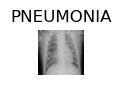

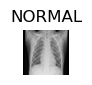

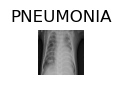

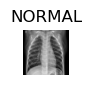

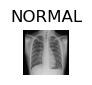

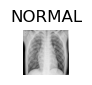

In [31]:
for images,labels in test_ds.take(1):
    for i in range(6):
        plt.figure(figsize=(15,2))
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names_train[labels[i]])
        plt.axis("off")


In [33]:
for images, labels in test_ds.take(1):
    prob = model.predict(images[1:2])[0][0] 
    predicted_label = 1 if prob > 0.5 else 0
    print("Predicted Label:", predicted)
    print("Probability:", prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Label: 1
Probability: 0.99978256
